In [2]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

In [2]:
import numpy as np
import string
import re
import itertools
!pip install d2l
!pip install transformers
!pip install polars
import torch
torch.manual_seed(0)
from transformers import BertTokenizer, BertModel
import matplotlib.pyplot as plt
import polars as pl
import collections
import random
import re
import torch
from d2l import torch as d2l

  Using cached d2l-0.17.6-py3-none-any.whl (112 kB)
  Using cached requests-2.25.1-py2.py3-none-any.whl (61 kB)
  Using cached numpy-1.21.5-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
  Using cached pandas-1.2.4-cp38-cp38-manylinux1_x86_64.whl (9.7 MB)
  Using cached idna-2.10-py2.py3-none-any.whl (58 kB)
  Using cached chardet-4.0.0-py2.py3-none-any.whl (178 kB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
  Attempting uninstall: idna
    Found existing installation: idna 3.3
    Uninstalling idna-3.3:
      Successfully uninstalled idna-3.3
  Attempting uninstall: requests
    Found existing installation: requests 2.27.1
    Uninstalling requests-2.27.1:
      Successfully uninstalled requests-2.27.1
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
ERROR: 

In [3]:

# Load the pre-trained model tokenizer (vocabulary)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

# Use a generator function to yield the data one batch at a time
def process_text(file):
    with open(file, encoding='utf-8-sig') as f:
        # Process each line of the file
        for line in f:
            # Use a regular expression to remove punctuation and lowercase the text
            line = re.sub(f'[{string.punctuation}]', '', line)
            line = line.lower()
            # Tokenize the text and yield the result
            yield tokenizer.tokenize(line)

# Use the map function to apply the process_text function to each line of the file
text_tokens = map(process_text, ['bible.txt'])

# Use the itertools module to flatten the list of lists
text_tokens = list(itertools.chain.from_iterable(text_tokens))

# Create a Polars DataFrame from the list of tokens
df = pl.DataFrame({'tokens': text_tokens})

# Use the head() method to print the first 10 rows of the DataFrame
print(df.tail(10))

shape: (10, 1)
┌─────────────────────────────────────┐
│ tokens                              │
│ ---                                 │
│ list[str]                           │
╞═════════════════════════════════════╡
│ []                                  │
│ []                                  │
│ ["most", "people", ... "facility... │
│ []                                  │
│ ...                                 │
│ ["this", "web", ... "##tm"]         │
│ ["including", "how", ... "litera... │
│ ["archive", "foundation", ... "t... │
│ ["sub", "##scribe", ... "##s"]      │
└─────────────────────────────────────┘


In [4]:
!pip install textblob
import re
from textblob import TextBlob
import pandas as pd
import string

def clean_text(text: str) -> str:
    # Use a regular expression to remove punctuation, URLs, emails, and numbers
    text = re.sub(f'[{string.punctuation}]', '', text)
    text = re.sub(r'www\S+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'\S*@\S*\s?', '', text)
    text = ''.join([i for i in text if not i.isdigit()])
    return text.lower()

# Create a Pandas DataFrame from the list of tokens
# Load the text data into a Pandas DataFrame
df = pd.DataFrame({'tokens': text_tokens})

# Initialize a dictionary to store the scores
scores = {}

# Define a regular expression pattern to match positive words
positive_pattern = re.compile(r'\b(good|great|excellent|positive|happy|joy|love)\b')

# Define a regular expression pattern to match negative words
negative_pattern = re.compile(r'\b(bad|awful|terrible|negative|sad|hate)\b')

# Iterate over the rows of the DataFrame
for index, row in df.iterrows():
    # Extract the text from the row
    text = ' '.join(row['tokens'])  # convert the list of tokens to a string

    # Initialize the score to 0
    score = 0

    # Find all the positive words in the text
    positive_words = positive_pattern.findall(text)
    # Increase the score by the number of positive words
    score += len(positive_words)

    # Find all the negative words in the text
    negative_words = negative_pattern.findall(text)
    # Decrease the score by the number of negative words
    score -= len(negative_words)
    
    # Store the score in the scores dictionary
    scores[index] = score
    
# Calculate the overall sentiment of the text
overall_sentiment = sum(scores.values()) / len(scores)

# Print the overall sentiment
print(f'Overall sentiment: {overall_sentiment:.2f}')

# Use TextBlob to calculate the overall sentiment
blob = TextBlob(text)
overall_sentiment = blob.sentiment.polarity
print(f'Overall sentiment (TextBlob): {overall_sentiment:.2f}')


  Using cached textblob-0.17.1-py2.py3-none-any.whl (636 kB)
  Using cached nltk-3.8.1-py3-none-any.whl (1.5 MB)


<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


Overall sentiment: 0.02
Overall sentiment (TextBlob): 0.14


In [9]:
import matplotlib.pyplot as plt

# Create a Pandas DataFrame with the data to plot
df = pd.DataFrame({'Sentiment': scores.values()})

# Use the plot() method to create a bar plot
df.plot(kind='bar')

# Show the plot
plt.show()


In [ ]:
import nltk
# Download the stop words list from NLTK
nltk.download('stopwords')

# Import the text file 
text = open('bible.txt', encoding='utf-8-sig')
text0 = text.read()

# Get the list of stop words
stop_words = nltk.corpus.stopwords.words('english')

# Use a list comprehension to filter the words
filtered_words = [word for word in text02.split() if word not in stop_words]

# Join the filtered words into a single string
filtered_text = ' '.join(filtered_words)
# Delete all the URLs and Emails in the file
text00 = re.sub(r'www\S+', '', text0)
text01 = re.sub(r'http\S+', '', text00)
text02 = re.sub(r'\S*@\S*\s?', '', text01)

# Delete all the numbers in the file
text1 = ''.join([i for i in text02 if not i.isdigit()])

# Delete all the punctuation marks
text2 = text1.translate(str.maketrans('','',string.punctuation))

# Convert text to LOWERCASE
text3 = text2.lower()

# Seperate each works with a space and save the words to a list named "data"
data = text3.split() 

In [11]:
word_counts = {}
for word in data:
  word_counts[word] = word_counts.get(word, 0) + 1

Traceback (most recent call last):
  Input In [11] in <cell line: 2>
    for word in data:
NameError: name 'data' is not defined

Use %tb to get the full traceback.


In [12]:
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

In [13]:
for i in range(25):
  print(sorted_word_counts[i][0], sorted_word_counts[i][1])


Traceback (most recent call last):
  Input In [13] in <cell line: 1>
    print(sorted_word_counts[i][0], sorted_word_counts[i][1])
IndexError: list index out of range

Use %tb to get the full traceback.


In [15]:
# Get the word labels and frequencies from the sorted dictionary
labels = [word[0] for word in sorted_word_counts[:25]]
values = [word[1] for word in sorted_word_counts[:25]]



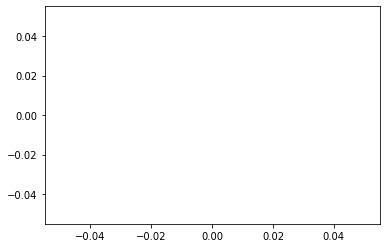

Traceback (most recent call last):
  Input In [17] in <cell line: 14>
    plt.xlim([0, max(values) + 100])
ValueError: max() arg is an empty sequence

Use %tb to get the full traceback.


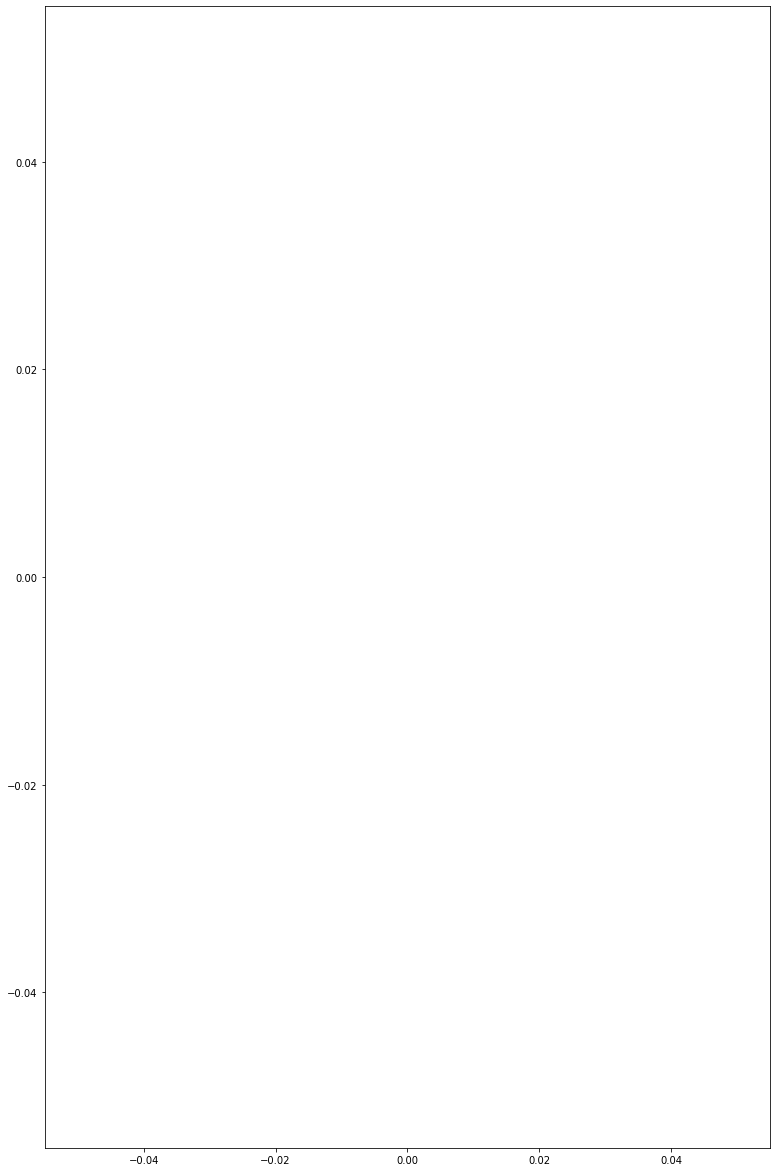

In [16]:
# Create a horizontal bar chart with matplotlib
plt.barh(labels, values, orientation='horizontal')
plt.yticks(rotation=0)
plt.show()

# Set the figure size
plt.figure(figsize=(13, 21))

# Create a horizontal bar chart with matplotlib
plt.barh(labels, values, orientation='horizontal')
plt.yticks(rotation=0)

# Set the limits of the x-axis
plt.xlim([0, max(values) + 100])

# Add gridlines
plt.grid()



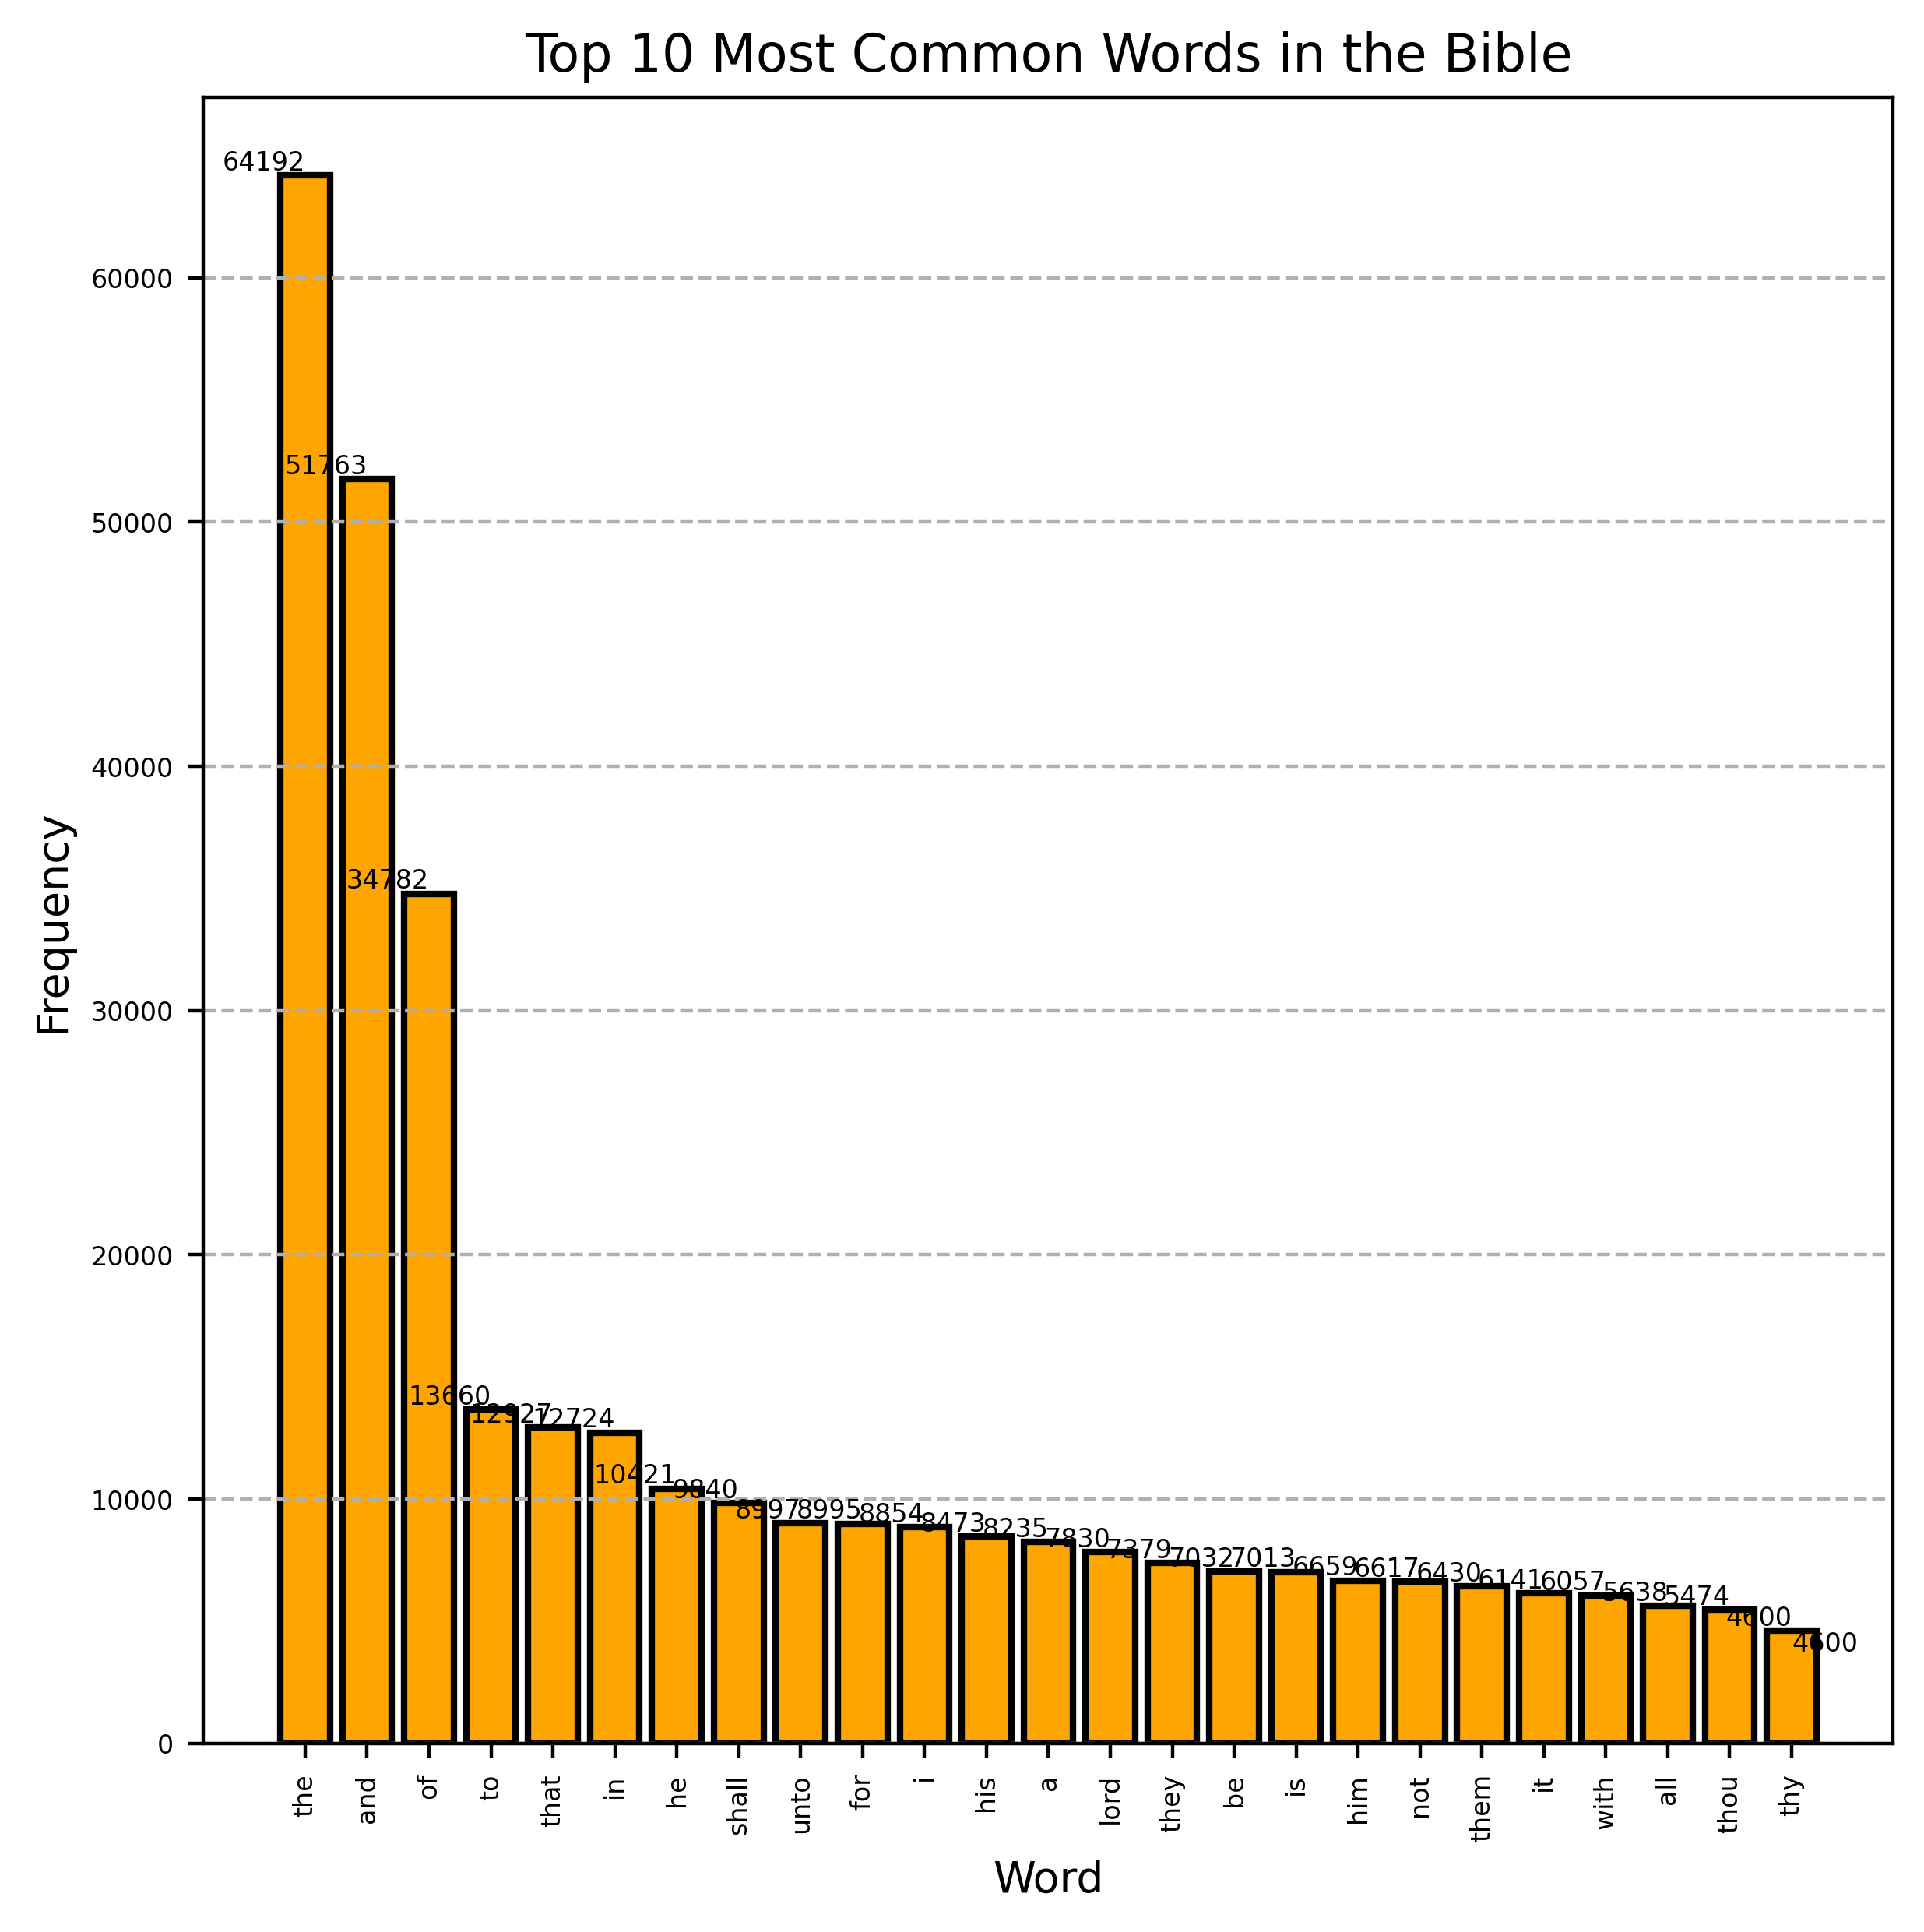

In [145]:
import matplotlib.pyplot as plt
import io
# Set the figure size and dpi
plt.figure(figsize=(700/100, 700/100), dpi=400)

plt.bar(labels, values)
plt.xticks(rotation=90)
plt.title("Top 10 Most Common Words in the Bible")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.bar(labels, values, color="orange", edgecolor="black", linewidth=1.5)
plt.tick_params(axis='both', which='major', labelsize=6, labelcolor='black')
for i, v in enumerate(values):
  plt.text(i, v, str(v), ha='right', va='bottom', fontsize=6)

if isinstance(v, int) or isinstance(v, float):
    # Align the text label to the top left corner of the bar
    plt.text(i, v, str(v), ha='left', va='top', fontsize=6)
else:
    # Align the text label to the center of the bar
    plt.text(i, v, str(v), ha='center', va='center', fontsize=6)

plt.grid(axis='y', linestyle='--')

# Get the image array of the plot
buf = io.BytesIO()
plt.savefig(buf, format='png')
buf.seek(0)
image_array = plt.imread(buf)

# Save the image array to a PDF file
plt.imsave("10grep.pdf", image_array, format="pdf")


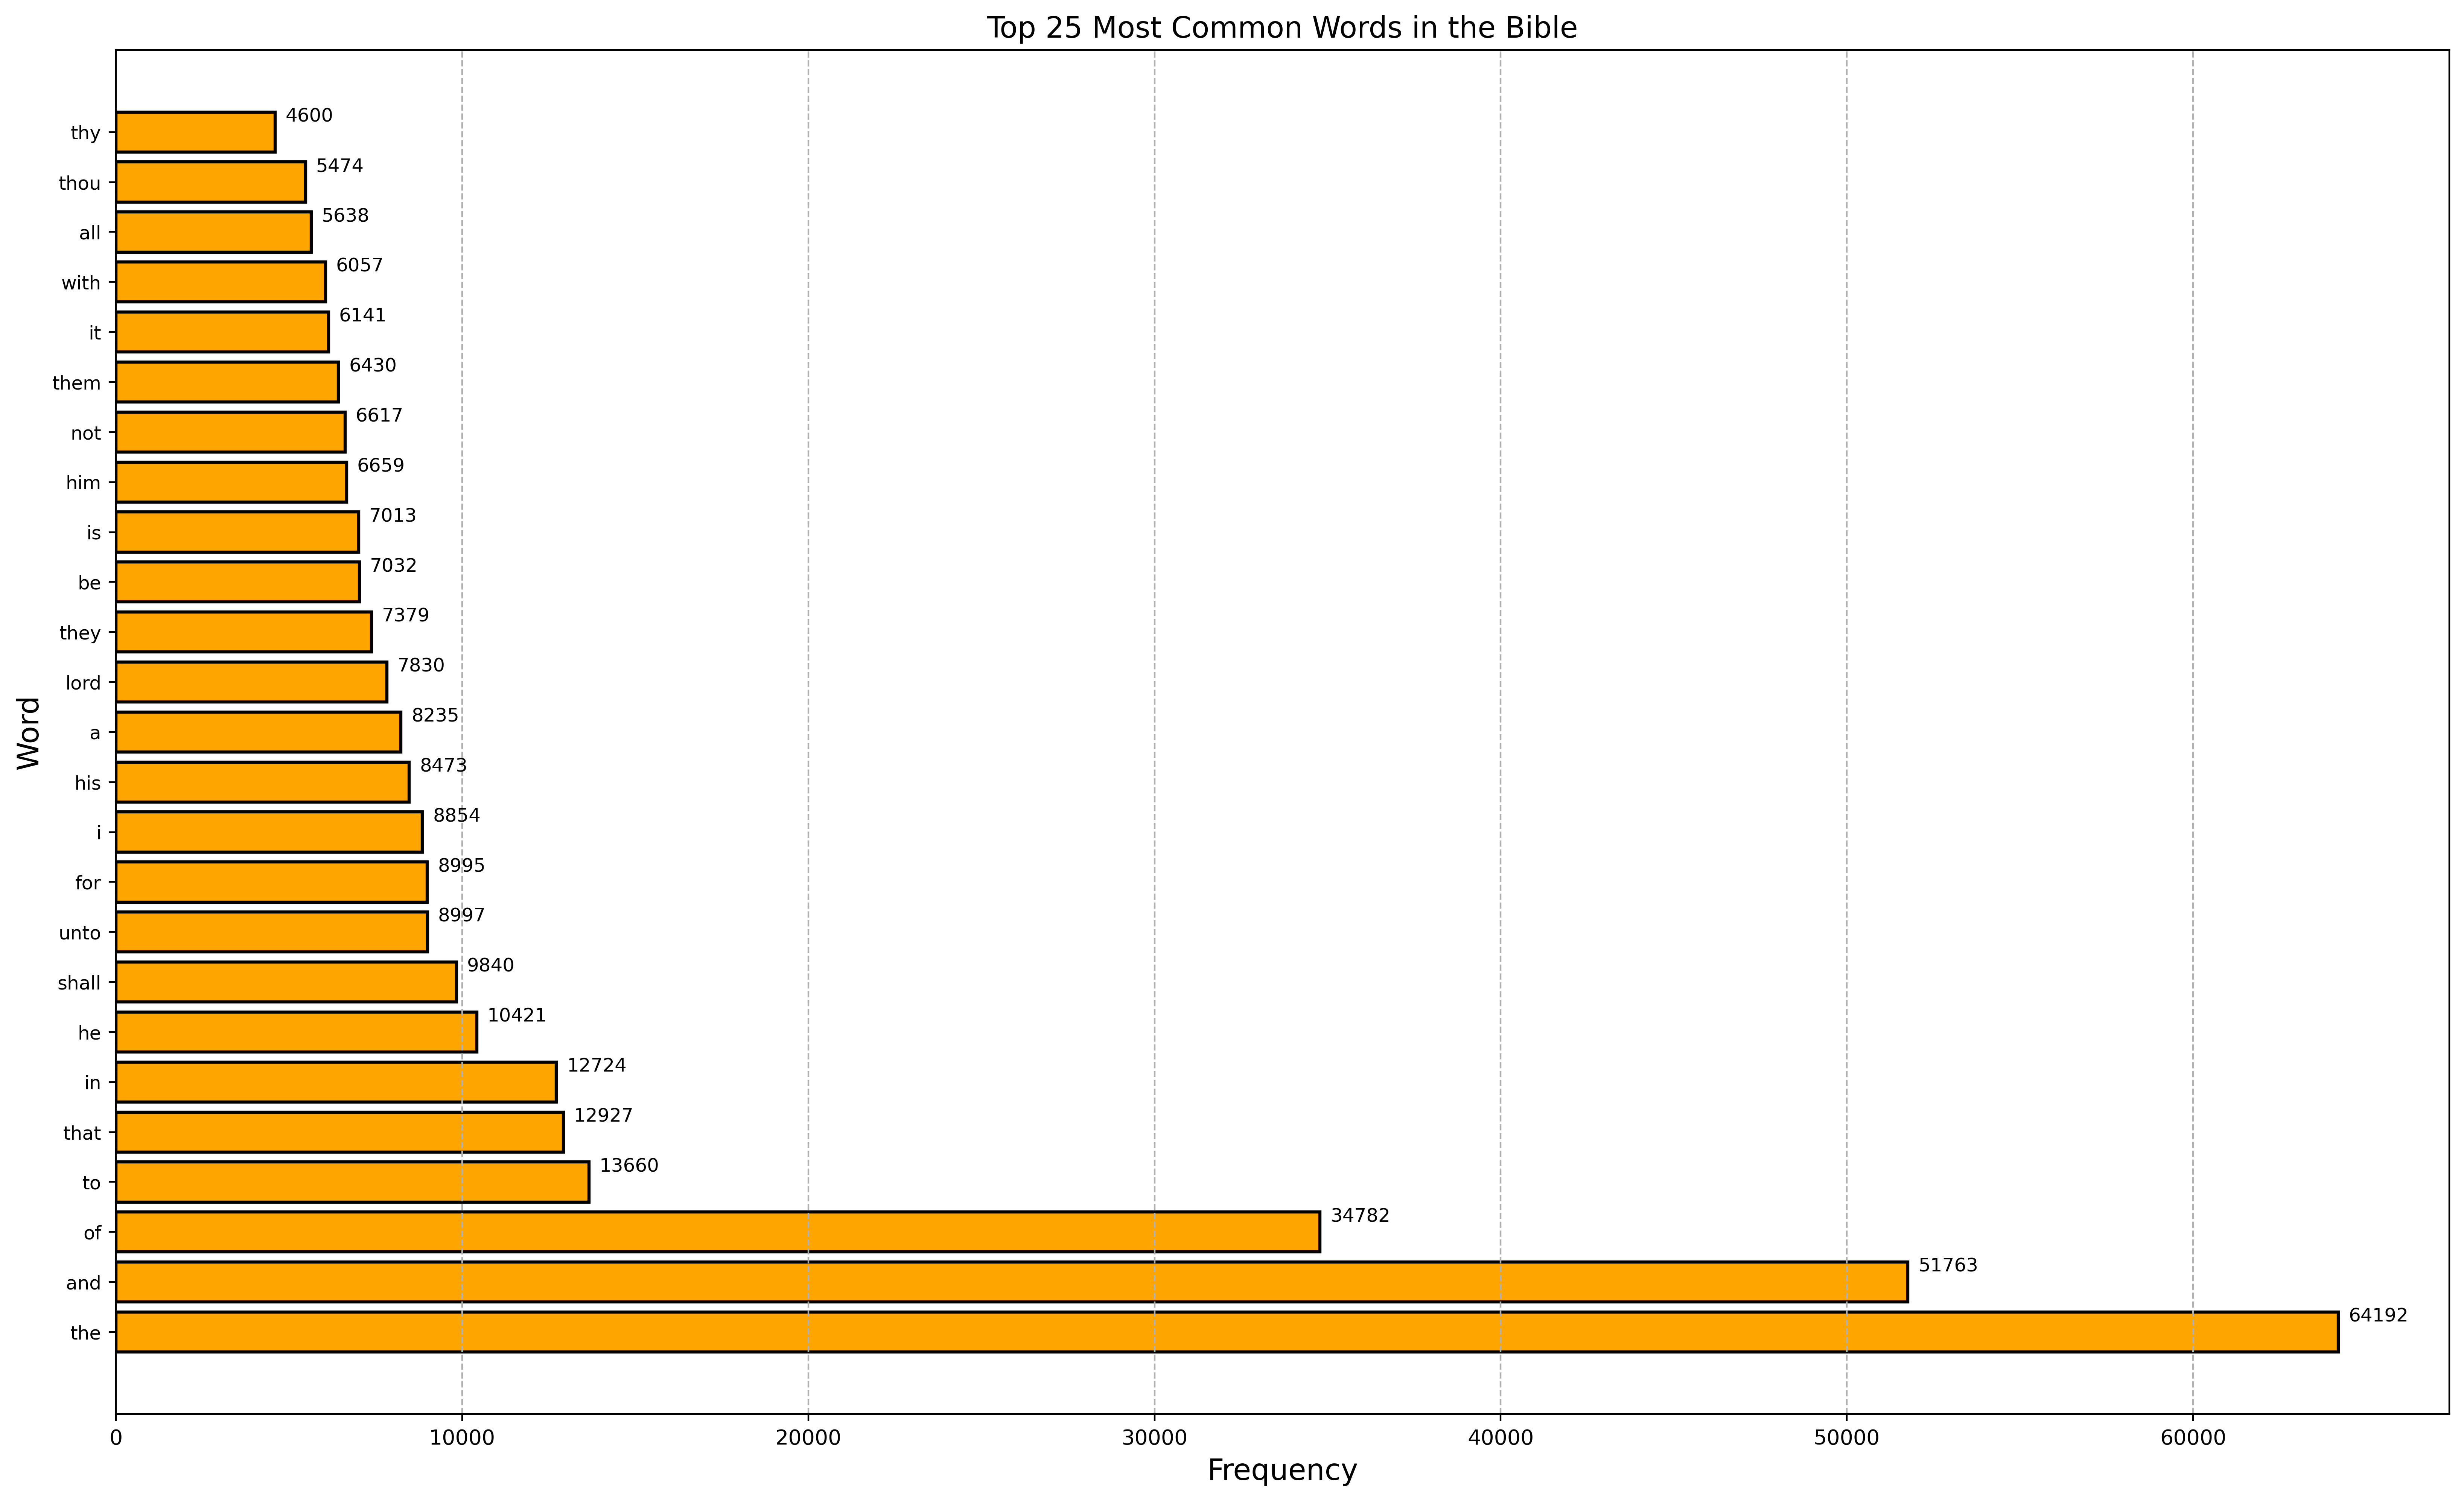

In [173]:
import matplotlib.pyplot as plt
import io

# Set the figure size and dpi
plt.figure(figsize=(20, 12), dpi=400)

# Create the bar plot
plt.barh(labels, values, color="orange", edgecolor="black", linewidth=1.5)

# Set the y-axis tick labels
plt.yticks(rotation=0, fontsize=9)

# Add a title and axis labels
plt.title("Top 25 Most Common Words in the Bible", fontsize=14)
plt.xlabel("Frequency", fontsize=14)
plt.ylabel("Word", fontsize=14)

# Add value labels to the bars
for i, v in enumerate(values):
    plt.annotate(str(v), xy=(v, i), xytext=(5, 5), textcoords='offset points', fontsize=9, color='black')

# Add a grid
plt.grid(axis='x', linestyle='--')

# Get the image array of the plot
buf = io.BytesIO()
plt.savefig(buf, format='png')
buf.seek(0)
image_array = plt.imread(buf)

# Save the image array to a PDF file
plt.imsave("25grep.pdf", image_array, format="pdf")

In [7]:
import matplotlib.pyplot as plt
import io
# Create the plot
plt.barh(labels, values, color="orange", edgecolor="black", linewidth=1.5)
plt.figure(figsize=(20, 12), dpi=400)
# Set the y-axis tick labels
plt.yticks(rotation=0)

# Add a title and axis labels
plt.title("Top 10 Most Common Words in the Bible")
plt.xlabel("Frequency")
plt.ylabel("Word")

# Add value labels to the bars
for i, v in enumerate(values):
    plt.annotate(str(v), xy=(v, i), xytext=(5, 5), textcoords='offset points', fontsize=6, color='black')

# Add a grid
plt.grid(axis='x', linestyle='--')

# Get the image array of the plot
buf = io.BytesIO()
plt.savefig(buf, format='png')
buf.seek(0)
image_array = plt.imread(buf)

# Save the image array to a PDF file
plt.imsave("plot.pdf", image_array, format="pdf")

Traceback (most recent call last):
  Input In [7] in <cell line: 4>
    plt.barh(labels, values, color="orange", edgecolor="black", linewidth=1.5)
NameError: name 'labels' is not defined

Use %tb to get the full traceback.


# tokens: 1 ['.faiz.ullah.bhai.head.master.of.the.schools.of.anjuman.i.islam.ralph.']
# tokens: 1 ['false.man.max.m.ller.']
# tokens: 1 ['literatures.of.these.many.lands.the.persians.for.example.retained.']
# tokens: 1 ['forth.in.ordinary.conversation.between.man.and.man.the.details.of.his.']
# tokens: 1 ['learn.as.much.of.mohammed.the.man.and.of.the.daily.life.and.thought.of.']
# tokens: 1 ['world.instead.omar.ordered.the.thousands.of.manuscripts.to.be.used.to.']
# tokens: 1 ['the.chief.virtue.in.mohammed.s.teaching.became.unknown.in.human.']
# tokens: 1 ['course.speak.cynically.of.mankind.s.having.found.this.somewhat.true.in.']
# tokens: 1 ['meadows.fills.many.volumes.from.which.we.give.the.most.attractive.']
# tokens: 1 ['previous.romancers.was.al.biruni.whose.chronology.our.']
Top 10 most common words: [('.faiz.ullah.bhai.head.master.of.the.schools.of.anjuman.i.islam.ralph.', 1), ('false.man.max.m.ller.', 1), ('literatures.of.these.many.lands.the.persians.for.example.retained.', 1)

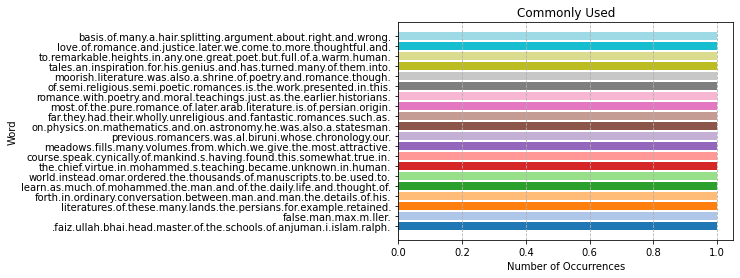

In [6]:
import re
import collections
import matplotlib.pyplot as plt
import io
# Open the file and read the lines into a list
with open('kin.txt', 'r') as f: 
    lines = f.readlines()

# Use a list comprehension to filter the lines, apply the regular expression, and lowercase conversion
raw_dataset = [re.sub('[^A-Za-z]+', '.', st).lower().split() for st in lines if re.search('man', st)]

# Print the resulting list of tokenized lines
for st in raw_dataset[:10]:
    print('# tokens:', len(st), st)

# Create a counter from the raw dataset
counter = collections.Counter([token for line in raw_dataset for token in line])

# Print the 10 most common words
N = 10
print('Top 10 most common words:', counter.most_common(N))

# Get the N most common words from the counter
N = 20
most_common = counter.most_common(N)

# Extract the words and counts from the most common list
words, counts = zip(*most_common)

# Set the colors for the bars
colors = plt.cm.tab20(range(N))

# Create the bar chart
plt.barh(range(N), counts, color=colors)
plt.yticks(range(N), words)
plt.xlabel('Number of Occurrences')
plt.ylabel('Word')
plt.title('Commonly Used')

# Add a grid
plt.grid(axis='x', linestyle='--')
# Get the image array of the plot
buf = io.BytesIO()
plt.savefig(buf, format='png')
buf.seek(0)
image_array = plt.imread(buf)

# Save the image array to a PDF file
plt.imsave("plot12.pdf", image_array, format="pdf")

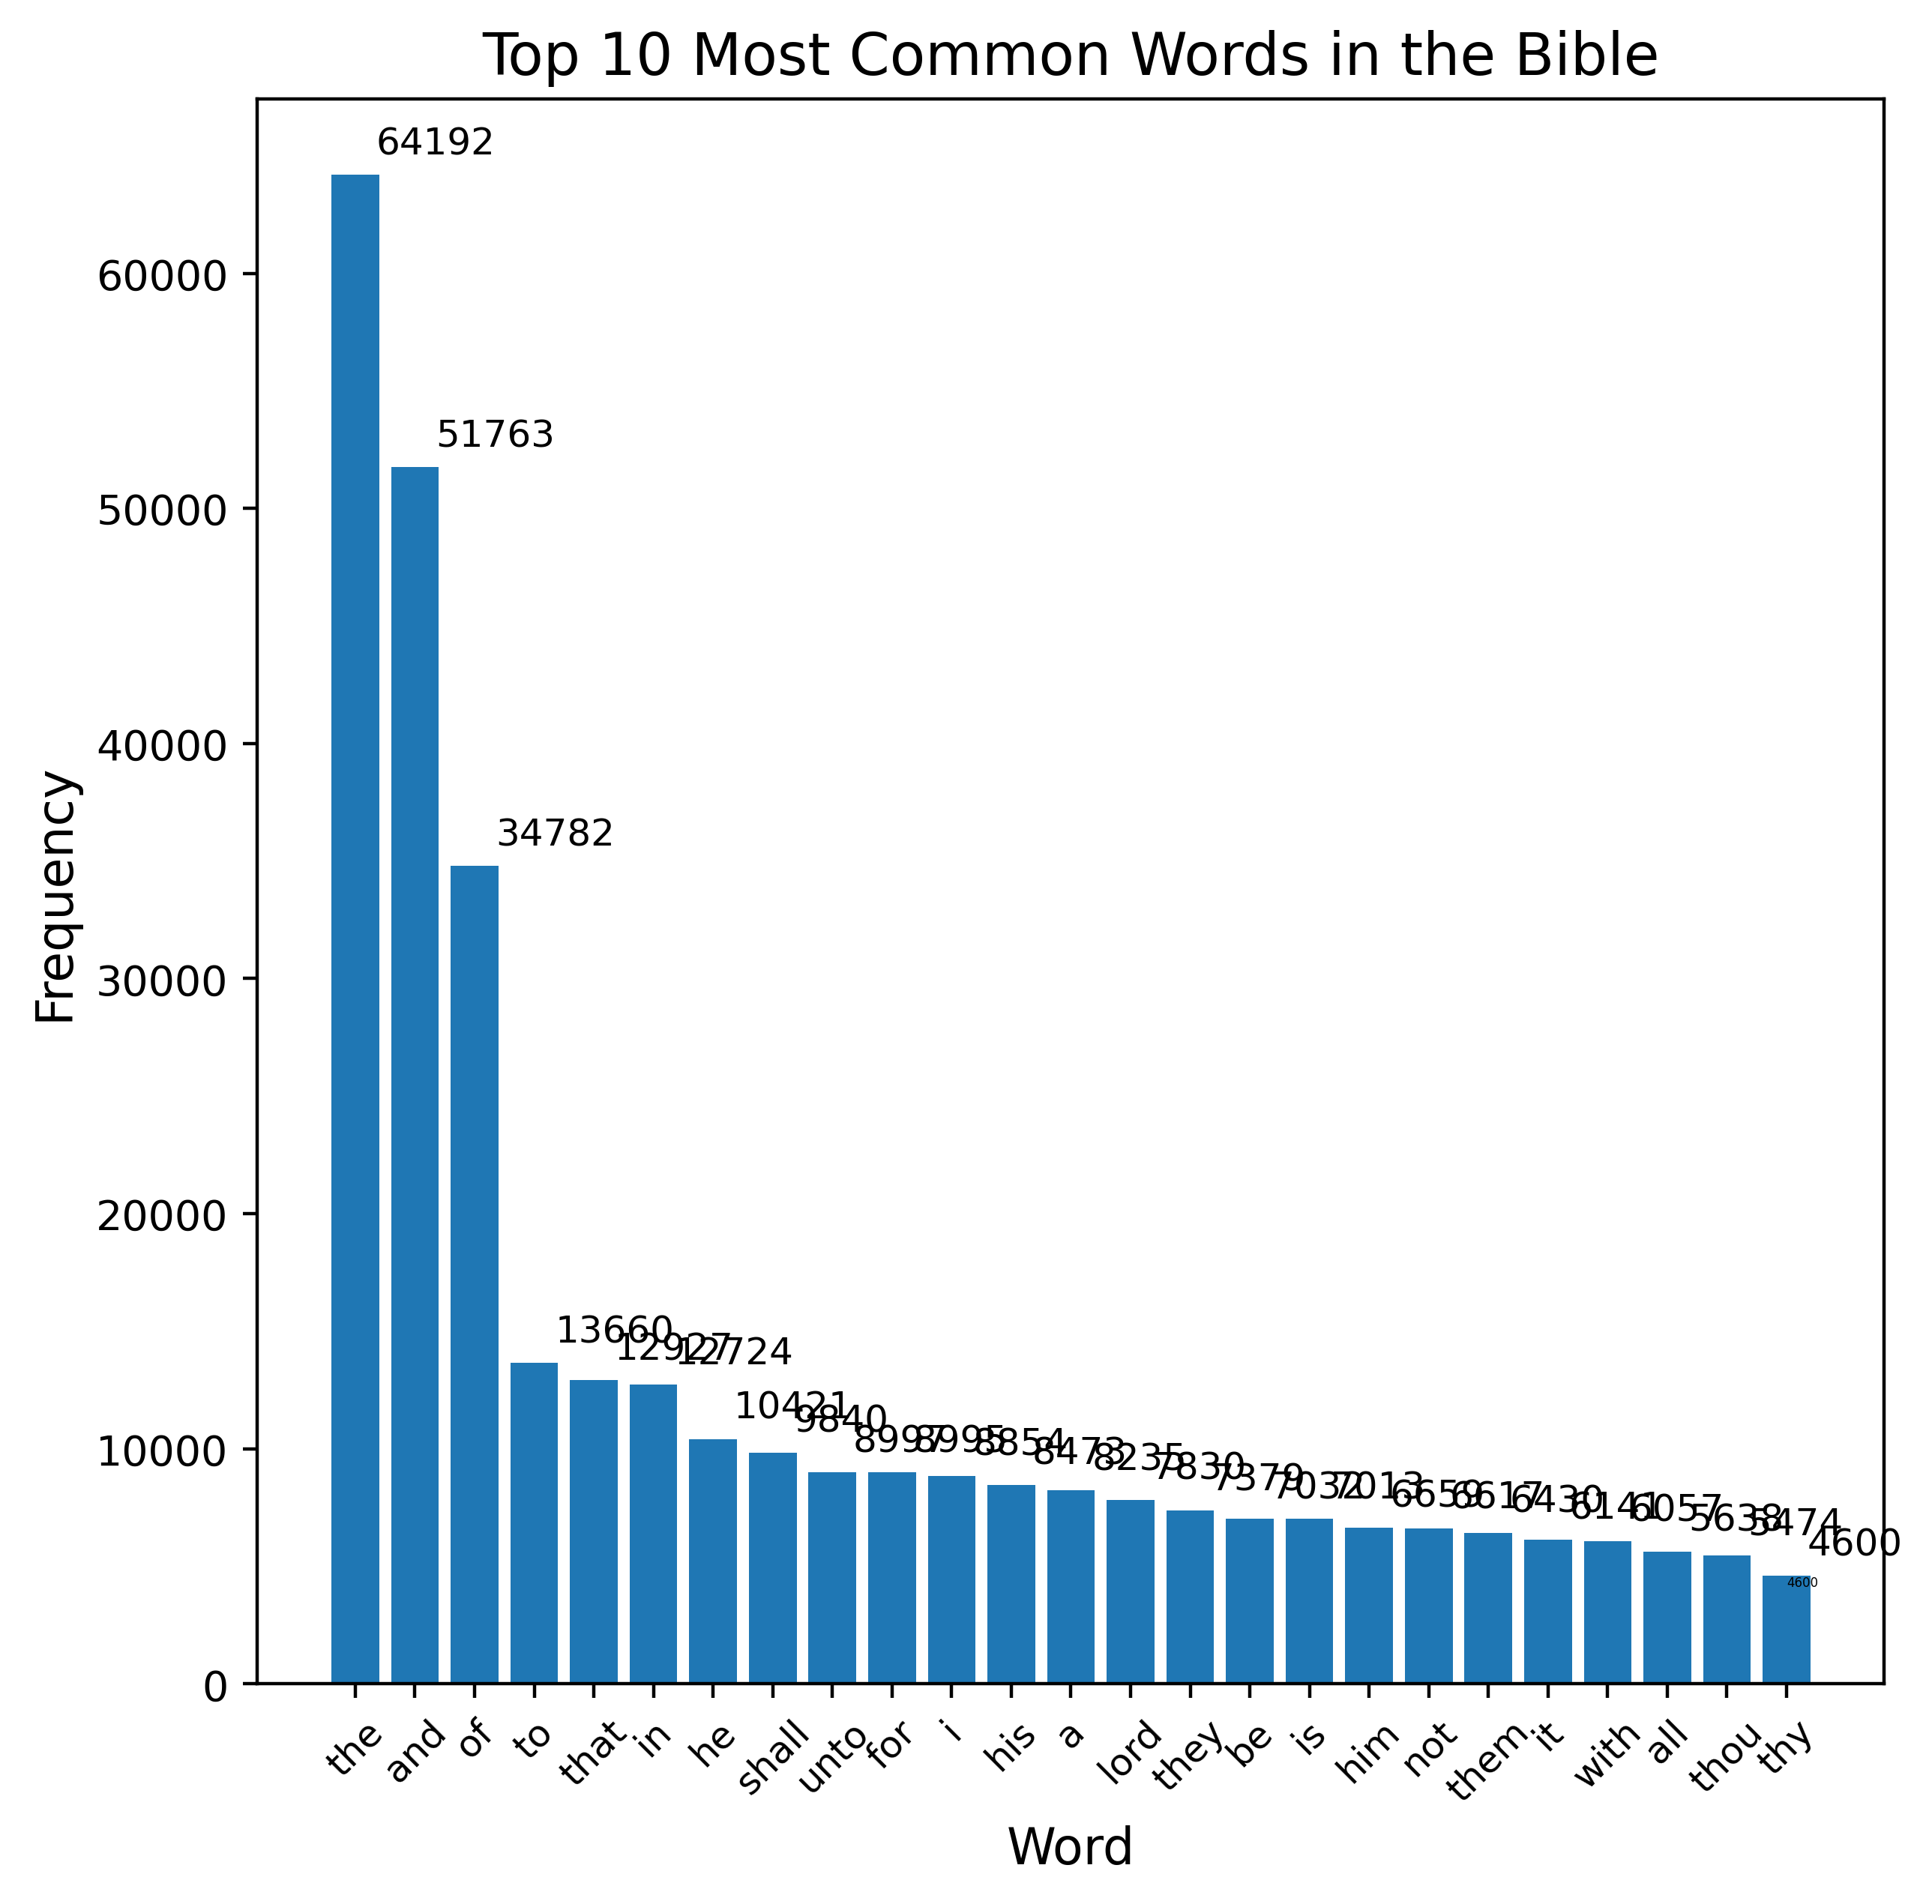

In [180]:
import matplotlib.pyplot as plt
import io
# Set the figure size and dpi
plt.figure(figsize=(700/100, 700/100), dpi=400)

# Create the bar plot
plt.bar(labels, values)

# Set the x-axis tick labels
plt.xticks(rotation=45, fontsize=9)

for i, v in enumerate(values):
    plt.annotate(str(v), xy=(i, v), xytext=(5, 5), textcoords='offset points', fontsize=9)

if isinstance(v, int) or isinstance(v, float):
    # Align the text label to the top left corner of the bar
    plt.text(i, v, str(v), ha='left', va='top', fontsize=3)
else:
    # Align the text label to the center of the bar
    plt.text(i, v, str(v), ha='left', va='top', fontsize=3)

# Add a title and axis labels
plt.title("Top 10 Most Common Words in the Bible", fontsize=14)
plt.xlabel("Word", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# Show the plot
plt.show()



In [56]:
# Save the plot with a high resolution
plt.savefig('bible_word_11.jpg', dpi=1400)


<Figure size 432x288 with 0 Axes>

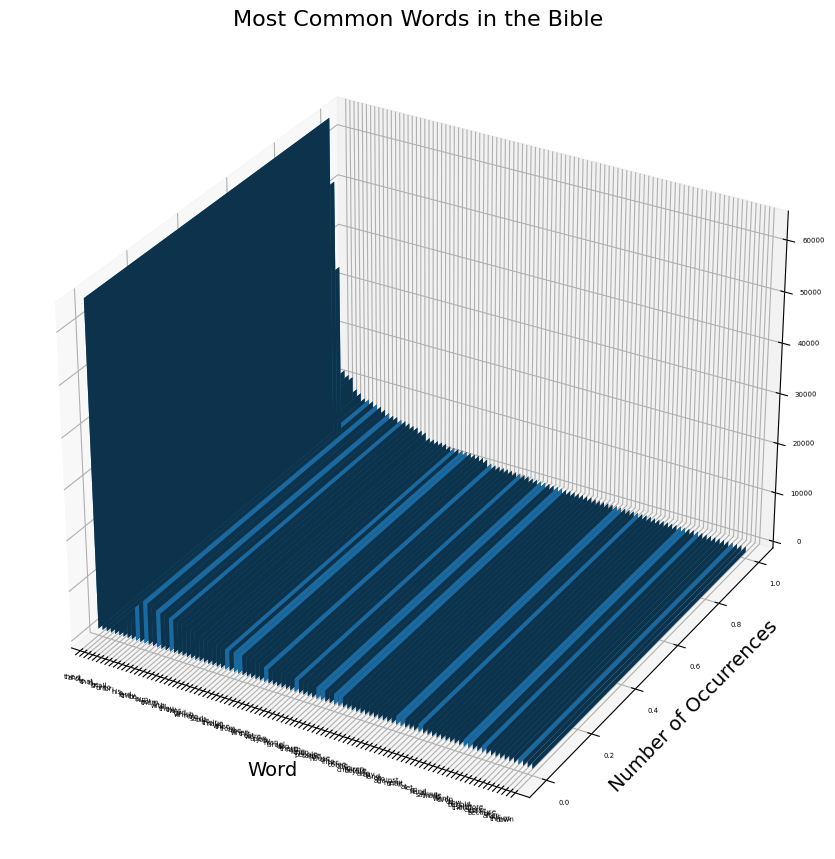

In [104]:
# Import the Axes3D class
from mpl_toolkits.mplot3d import Axes3D

# Set the figure size and dpi
fig = plt.figure(figsize=(1920/100, 1080/100), dpi=100)

# Create a 3D Axes object
ax = fig.add_subplot(111, projection='3d')

# Convert the labels list to a NumPy array of integers
labels_int = np.arange(len(labels))

# Create a 3D bar chart
ax.bar3d(labels_int, np.zeros(len(labels_int)), np.zeros(len(labels_int)), np.zeros(len(labels_int)), np.ones(len(labels_int)), values)

import math

# Convert 90 degrees to radians
rotation_in_radians = math.radians(90)

# Adjust the font size of the tick labels and rotate them
plt.tick_params(labelsize=5, rotation=rotation_in_radians)

# Set the x-axis tick labels
ax.set_xticks(labels_int)
ax.set_xticklabels(labels)
# Set the x-axis limits to a fixed range
ax.set_xlim([0, 100])
# Add a title and axis labels
ax.set_title('Most Common Words in the Bible', fontsize=16)
ax.set_xlabel('Word', fontsize=14)
ax.set_ylabel('Number of Occurrences', fontsize=14)

plt.show()


Traceback (most recent call last):
  Input In [111] in <cell line: 36>
    plt.legend(['Number of Occurrences'])
  File /opt/conda/lib/python3.8/site-packages/matplotlib/pyplot.py:2655 in legend
    return gca().legend(*args, **kwargs)
  File /opt/conda/lib/python3.8/site-packages/matplotlib/axes/_axes.py:305 in legend
    self.legend_ = mlegend.Legend(self, handles, labels, **kwargs)
  File /opt/conda/lib/python3.8/site-packages/matplotlib/legend.py:499 in __init__
    self._init_legend_box(handles, labels, markerfirst)
  File /opt/conda/lib/python3.8/site-packages/matplotlib/legend.py:780 in _init_legend_box
    handle_list.append(handler.legend_artist(self, orig_handle,
  File /opt/conda/lib/python3.8/site-packages/matplotlib/legend_handler.py:119 in legend_artist
    artists = self.create_artists(legend, orig_handle,
  File /opt/conda/lib/python3.8/site-packages/matplotlib/legend_handler.py:833 in create_artists
    self.update_prop(p, orig_handle, legend)
  File /opt/conda/lib/pyt

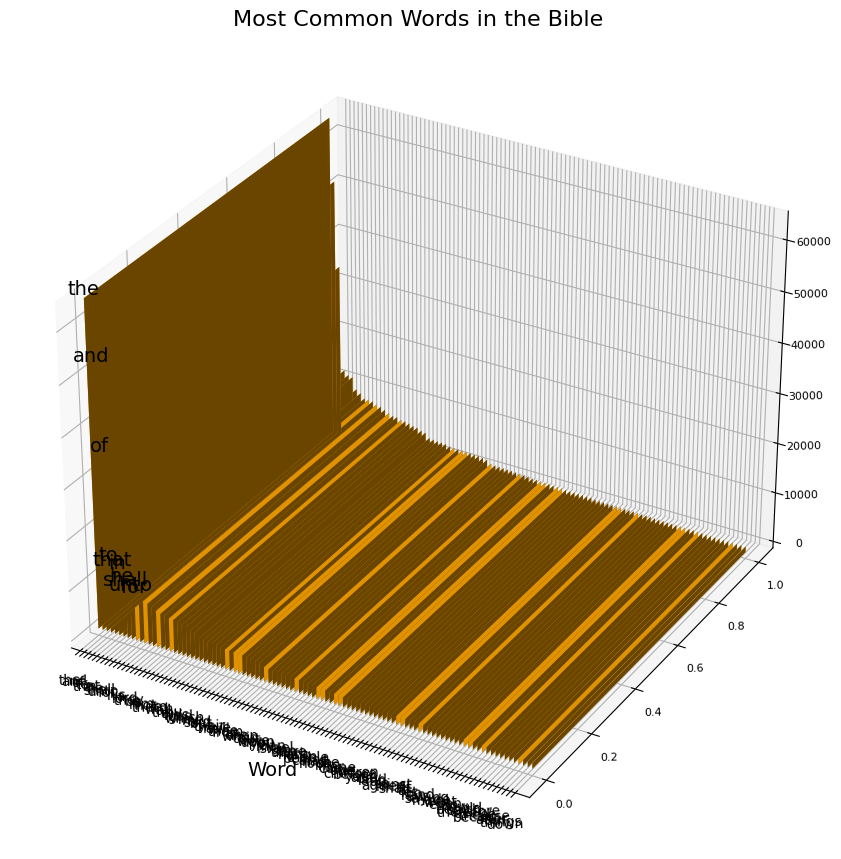

In [111]:

# Import the Axes3D class
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

# Set the figure size and dpi
fig = plt.figure(figsize=(1920/100, 1080/100), dpi=100)

# Create a 3D Axes object
ax = fig.add_subplot(111, projection='3d')

# Convert the labels list to a NumPy array of integers
labels_int = np.arange(len(labels))

# Create a 3D bar chart
for i, (label, value, color) in enumerate(zip(labels, values, colors)):
    ax.text(i, 0, value + 1, label, ha='center', va='bottom', fontsize=14, color='black')

# Set the x-axis tick labels
ax.set_xticks(labels_int)
ax.set_xticklabels(labels)
# Set the x-axis limits to a fixed range
ax.set_xlim([0, 100])
# Add a title and axis labels
ax.set_title('Most Common Words in the Bible', fontsize=16)
ax.set_xlabel('Word', fontsize=14)
# Adjust the font size of the tick labels and rotate them
plt.tick_params(labelsize=8, rotation=rotation_in_radians)

# Set the x-axis tick labels
ax.set_xticks(labels_int)
ax.set_xticklabels(labels, fontsize=10)
# Create a 3D bar chart with colors
ax.bar3d(labels_int, np.zeros(len(labels_int)), np.zeros(len(labels_int)), np.zeros(len(labels_int)), np.ones(len(labels_int)), values, color='orange')
# Add a legend
plt.legend(['Number of Occurrences'])
# Add gridlines
ax.grid()
# Adjust the aspect ratio
ax.view_init(elev=10, azim=30)
# Save the plot

for i, v in enumerate(values):
    ax.bar3d(labels_int[i], np.zeros(len(labels_int)), np.zeros(len(labels_int)), np.zeros(len(labels_int)), np.ones(len(labels_int)), values[i], color=colors[i])
ax.set_xlim([-5, 105])
ax.set_ylim([0, 200])
ax.set_zlim([0, max(values) + 100])




In [33]:
# Import the text file 
with open('bible.txt', encoding='utf-8-sig') as f:
  # Read the contents into a string
  text = f.read()

# Preprocess the text
# Delete all the URLs and Emails in the file
text = re.sub(r'www\S+', '', text)
text = re.sub(r'http\S+', '', text)
text = re.sub(r'\S*@\S*\s?', '', text)
# Delete all the numbers in the file
text = ''.join([i for i in text if not i.isdigit()])
# Delete all the punctuation marks
text = text.translate(str.maketrans('','',string.punctuation))
# Convert text to LOWERCASE
text = text.lower()
# Tokenize the text into words
words = text.split()

# Create a list of unique words
unique_words = set(words)

# Create a feature matrix and a label vector
X = []
y = []
for word in unique_words:
  # Create a binary column for each unique word
  X.append([1 if w == word else 0 for w in words])
  # Create a binary label for each unique word
  y.append(1 if word in words else 0)

# Convert X and y to NumPy arrays
X = np.array(X)
y = np.array(y)

# Split the feature matrix and label vector into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the GOSS tree
goss = GOSS(max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            sparsity_threshold=sparsity_threshold,
            random_state=42)

# Fit the tree to the training data
goss.fit(X_train, y_train)

# Predict the probability of a new word belonging to each class
new_word = 'heaven' # Replace with your new word
probs = goss.predict_proba([[1 if w == new_word else 0 for w in words]])[0]

# Calculate the probability of the new word appearing in the text
prob = probs[1] if new_word in words else probs[0]
print(f'Probability of "{new_word}" appearing in the text: {prob:.2f}')


KeyboardInterrupt



(100182, 1)


In [5]:
import torch
from transformers import BertTokenizer, BertModel

# Set the device to run on, using GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')
model.to(device)

# Open the text file and read the contents
with open('bible.txt', 'r') as f:
    text = f.read()

# Tokenize the text and convert it to a PyTorch tensor
input_ids = torch.tensor([tokenizer.encode(text, add_special_tokens=True)], device=device)

# Pass the input through the BERT model to get the embeddings
output = model(input_ids)[0]

# The output is a tensor of shape [batch_size, sequence_length, embedding_size]
# In this case, we only have one example in the batch, so we can access the embeddings for the first and only example using output[0]
embeddings = output[0]


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Token indices sequence length is longer than the specified maximum sequence length for this model (1102879 > 512). Running this sequence through the model 

Traceback (most recent call last):
  Input In [5] in <cell line: 20>
    output = model(input_ids)[0]
  File /opt/conda/lib/python3.8/site-packages/torch/nn/modules/module.py:1110 in _call_impl
    return forward_call(*input, **kwargs)
  File /opt/conda/lib/python3.8/site-packages/transformers/models/bert/modeling_bert.py:987 in forward
    buffered_token_type_ids_expanded = buffered_token_type_ids.expand(batch_size, seq_length)
RuntimeError: The expanded size of the tensor (1102879) must match the existing size (512) at non-singleton dimension 1.  Target sizes: [1, 1102879].  Tensor sizes: [1, 512]

Use %tb to get the full traceback.
